<a href="https://colab.research.google.com/github/LPapakostas/Deep_Learning_Projects/blob/master/Classifying_Movie_Review_From_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

priority_of_word = 10000

In [0]:
(train_data,train_labels) , (test_data,test_labels) = imdb.load_data(num_words=priority_of_word)

The argument **num_words=10000** means that we will keep only the top 10000 most frequently used words in the training data.

The **train_data** and **test_data** variables are lists of reviews that each review being a list of word indices. **train_labels** and **test_labels** are lists of '0' and '1' with '0' being negative and '1' positive. All reviews words are permitted below to upper limit **num_words**. 

In [0]:
max([max(length) for length in train_data])

9999

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [0]:
decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

We need to make all of **train_data** and **test_data** same length in order to use it as a tensor for network input. In order to do that, we will make a reference table of **num_words** length that contains '1' and '0' in presence of i-word. 

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences,dimension):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [0]:
x_train = vectorize_sequences(train_data,priority_of_word)
x_test = vectorize_sequences(test_data,priority_of_word)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


We will use a model with 2 initial *Dense* layers that have 16 hidden unit with *'relu'* activation and the final layer with *'sigmoid'* activation that interprented as a probability of a review being 0 or 1.

In [0]:
model = models.Sequential()
model.add( layers.Dense(units = 16 , activation = 'relu' , input_shape=(priority_of_word,) ))
model.add( layers.Dense( units =16, activation = 'relu'))
model.add( layers.Dense(units = 1, activation ='sigmoid'))

Since we face a binary classification problem and  the output of the network is a probability, we use as loss function *'binary crossentropy'*.
Cross Entropy is a quantity that measures the distance between probability distributions.

In [0]:
model.compile( optimizer = optimizers.RMSprop(lr =0.001) , loss ='binary_crossentropy' , metrics =['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit( partial_x_train , partial_y_train , epochs = 20 ,  batch_size = 512 , validation_data = (x_val,y_val) )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 210us/sample - loss: 0.5761 - acc: 0.7371 - val_loss: 0.4815 - val_acc: 0.8140
Epoch 2/20
15000/15000 [==============================] - 3s 198us/sample - loss: 0.3857 - acc: 0.8885 - val_loss: 0.3539 - val_acc: 0.8838
Epoch 3/20
15000/15000 [==============================] - 3s 198us/sample - loss: 0.2718 - acc: 0.9195 - val_loss: 0.2998 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 3s 195us/sample - loss: 0.2058 - acc: 0.9376 - val_loss: 0.2901 - val_acc: 0.8867
Epoch 5/20
15000/15000 [==============================] - 3s 194us/sample - loss: 0.1627 - acc: 0.9512 - val_loss: 0.2838 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 3s 193us/sample - loss: 0.1339 - acc: 0.9607 - val_loss: 0.2872 - val_acc: 0.8887
Epoch 7/20
15000/15000 [==============================] - 3s 193us/sample - loss: 0.1120 - acc: 0.9685 - val_l

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Plotting the training and validation loss

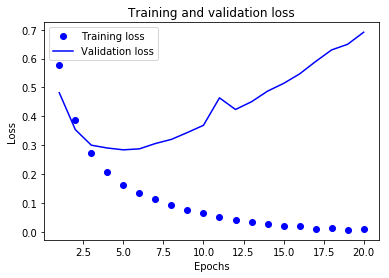

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


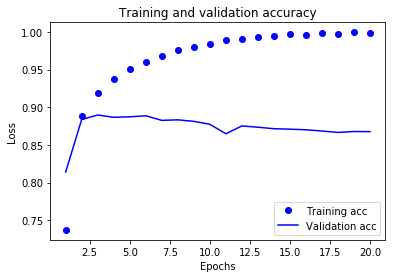

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


As you can see, the training loss is decreasing with every epoch and the training accuracy increases with every epoch.


As for the validation metrics, they seem to peak at fourth epoch. This is an example of **Overfitting**. A model that does perform better on training data isn't necessary a model that will do better on data it has never seen before.

In precise, after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In order to avoid this, we will create a simplier model with less epochs. 

In [0]:
model_new = models.Sequential()
model_new.add( layers.Dense( 16 , activation = 'relu' , input_shape = (priority_of_word,) ) )
model_new.add( layers.Dense( 16 , activation = 'relu' ))
model_new.add( layers.Dense ( 1 , activation = 'sigmoid'))


In [0]:
model_new.compile( optimizer = 'rmsprop' , loss = 'binary_crossentropy' , metrics = ['accuracy']  )

In [0]:
model_new.fit( partial_x_train , partial_y_train , epochs = 4 , batch_size = 512 )

Epoch 1/4
15000/15000 [==============================] - 2s 149us/sample - loss: 0.5235 - acc: 0.7781
Epoch 2/4
15000/15000 [==============================] - 2s 144us/sample - loss: 0.3009 - acc: 0.9057
Epoch 3/4
15000/15000 [==============================] - 2s 144us/sample - loss: 0.2167 - acc: 0.9298
Epoch 4/4
15000/15000 [==============================] - 2s 140us/sample - loss: 0.1702 - acc: 0.9452


In [0]:
results = model_new.evaluate( x_test , y_test )

25000/25000 [==============================] - 2s 72us/sample - loss: 0.2959 - acc: 0.8822


In [0]:
model_new.predict(x_test)

array([[0.28646702],
       [0.9996094 ],
       [0.9433781 ],
       ...,
       [0.13435152],
       [0.18626553],
       [0.71458435]], dtype=float32)

In [0]:
y_test


array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)